<a href="https://colab.research.google.com/github/Pooja-2709/Capstone-Project1---Telecom-Churn-Analysis/blob/main/pooja_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [ ]:
#mount drive to the colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the file from the drive
path = '/content/drive/MyDrive/Colab Notebooks/almabetter project/Copy of Telecom Churn.csv'
telecom_df = pd.read_csv(path)

# Analyzing the dataset

In [ ]:
# look at the intial rows of the data
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# look at the last 5 rows of the data
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# shape of data
telecom_df.shape

(3333, 20)

In [ ]:
# feature data summary(information of every columns)
telecom_df.info(verbose=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

There are 3333 rows and 20 columns in the data. Lot of the columns are numeric type, but we need to inspect which are the categorical columns.

In [ ]:
# look at the statistics of the data
telecom_df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [ ]:
#make a copy of the given data set
data = telecom_df.copy()

In [ ]:
#To know all the columns
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [ ]:
# summary of data set
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Data Wrangling

### Removing the null values

In [ ]:
#check the null values in every columns
data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
#check the overall null values in the whole data set
data.isnull().sum().sum()

0

In [ ]:
# look at missing value ratio in each column
data.isnull().sum()*100/data.shape[0]

State                     0.0
Account length            0.0
Area code                 0.0
International plan        0.0
Voice mail plan           0.0
Number vmail messages     0.0
Total day minutes         0.0
Total day calls           0.0
Total day charge          0.0
Total eve minutes         0.0
Total eve calls           0.0
Total eve charge          0.0
Total night minutes       0.0
Total night calls         0.0
Total night charge        0.0
Total intl minutes        0.0
Total intl calls          0.0
Total intl charge         0.0
Customer service calls    0.0
Churn                     0.0
dtype: float64

There are no missing values present in the data set

## Check Duplicate Values

In [ ]:
# check the duplicated value
len(data[data.duplicated()])

0

There is no duplicated values in the data set

In [ ]:
# check all the unique values
data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
#convert the data type of international plan, voice mail and churn
def conv_data_type (ldf):
    # Convert columns with Yes/No to 1/0
    ldf['International plan'] = ldf['International plan'].map({'Yes':1, 'No':0})
    ldf['Voice mail plan'] = ldf['Voice mail plan'].map({'Yes':1, 'No':0})
    ldf['Churn'] = ldf['Churn'].astype(int)
    return ldf

In [ ]:
conv_data_type(data)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [ ]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
data.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0
3332,TN,74,415,0,1,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,0


In [ ]:
data.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [ ]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [ ]:
### 0 = the customer is loyal towards the company(non churn)
### 1 = the customer is churn

Text(0.5, 1.0, 'Count of TARGET Variable per category')

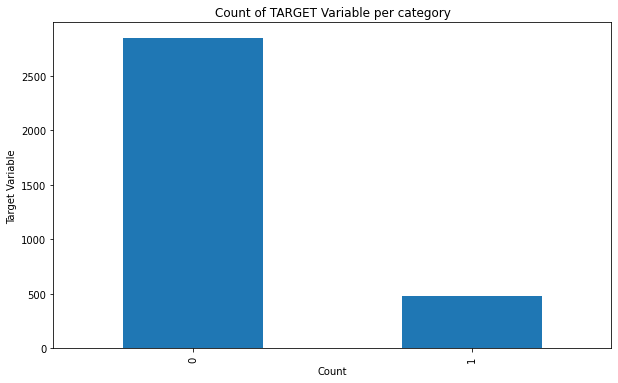

In [ ]:
data['Churn'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.xlabel("Count")
plt.ylabel("Target Variable")
plt.title("Count of TARGET Variable per category")

from the above graph it is clear, we have imbalance problem

In [ ]:
# take the values of churn in trms of percentage
100*data['Churn'].value_counts()/len(data['Churn'])

0    85.508551
1    14.491449
Name: Churn, dtype: float64

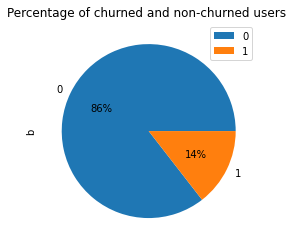

In [ ]:
#labels
lab = data['Churn'].value_counts().keys().tolist()
#values
val = data["Churn"].value_counts().values.tolist()
list_of_tuples = list(zip(lab, val)) 
per_plot=pd.DataFrame(list_of_tuples,columns=['a','b'])
per_plot.groupby(['a']).sum().plot(kind='pie', y='b', autopct='%1.0f%%',title='Percentage of churned and non-churned users ')

From the above graph and table it is clear that 14% of the base are classified as churn

from the above table and graph we can say that 2850(85%) out of 3333 are loyal and remaining 483(14%) are want to churn.


After analyzing the churn column Lets see other columns is correlated to the churn variable

# Outliers Handling

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total day charge')

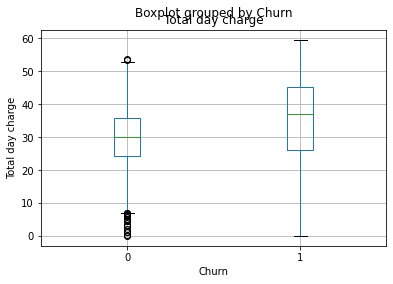

In [ ]:
data.boxplot(by ='Churn', column = ['Total day charge'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total day charge')

In [ ]:
data.drop(data[data['Total day charge']<=8].index,inplace=True)
data.drop(data[data['Total day charge']>=52].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


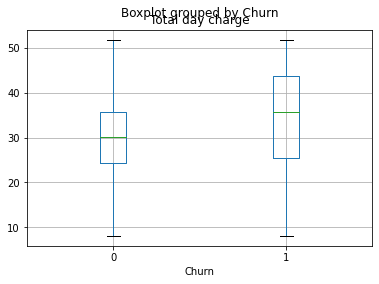

In [ ]:
data.boxplot(by ='Churn', column = ['Total day charge'], grid = True)

In [ ]:
data.shape

(3276, 20)

After removing the outliers we have 3276 rows and 20columns in the data set

In [ ]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## Univariate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


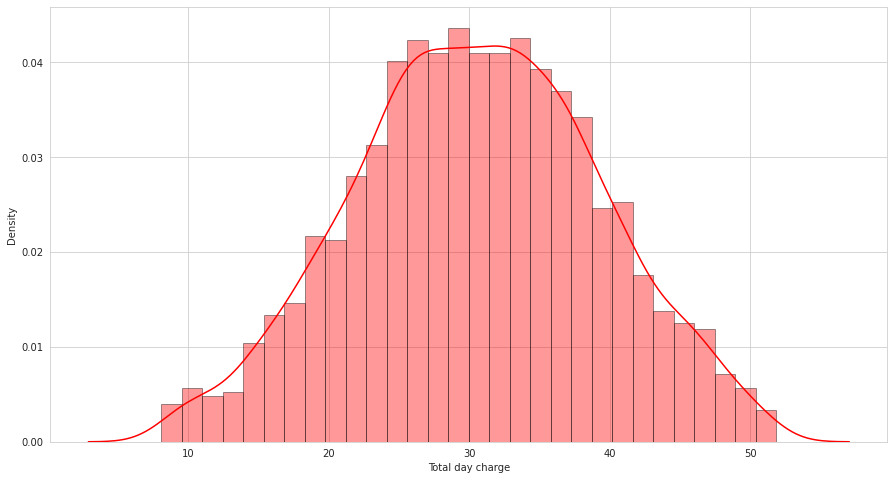

In [ ]:
plt.figure(figsize = (15, 8))
sns.set_style('whitegrid')
sns.distplot(a = data['Total day charge'], color ='red', bins = 30,  hist_kws={"edgecolor": 'black'})
plt.show()


In [ ]:
data['Total day charge'].max()

51.88

In [ ]:
data['Total day charge'].mean()

30.508742368742368

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


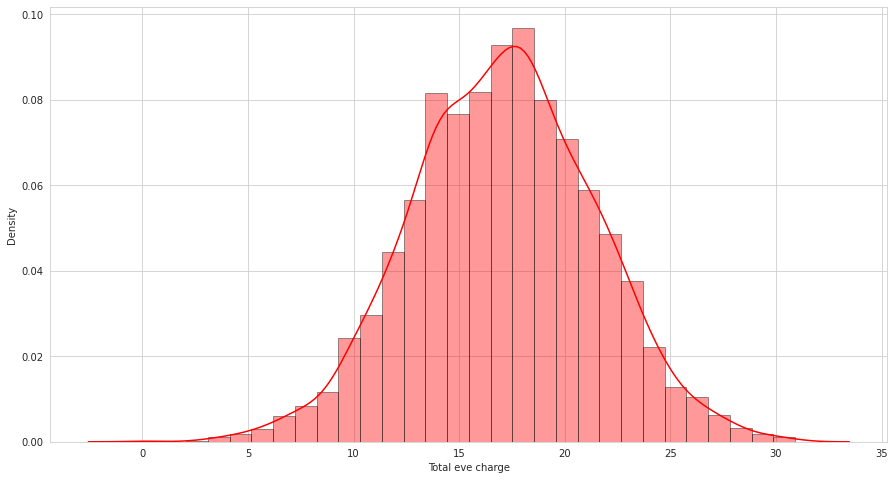

In [ ]:
plt.figure(figsize = (15, 8))
sns.set_style('whitegrid')
sns.distplot(data['Total eve charge'], color ='red', bins = 30, hist_kws={"edgecolor": 'black'})

In [ ]:
data['Total eve charge'].max()

30.91

In [ ]:
data['Total eve charge'].mean()

17.090699023199022

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


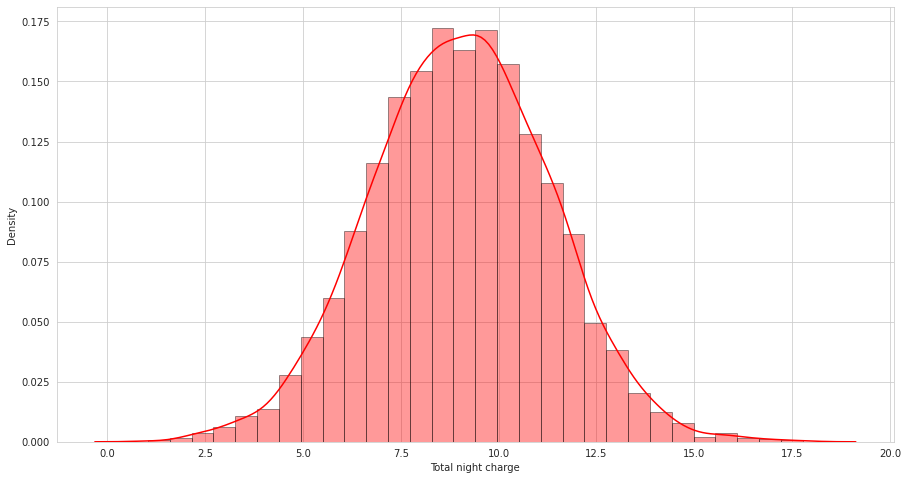

In [ ]:
plt.figure(figsize = (15, 8))
sns.set_style('whitegrid')
sns.distplot(data['Total night charge'], color ='red', bins = 30, hist_kws={"edgecolor": 'black'})

In [ ]:
data['Total night charge'].max()

17.77

In [ ]:
data['Total night charge'].mean()

9.037121489621489

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


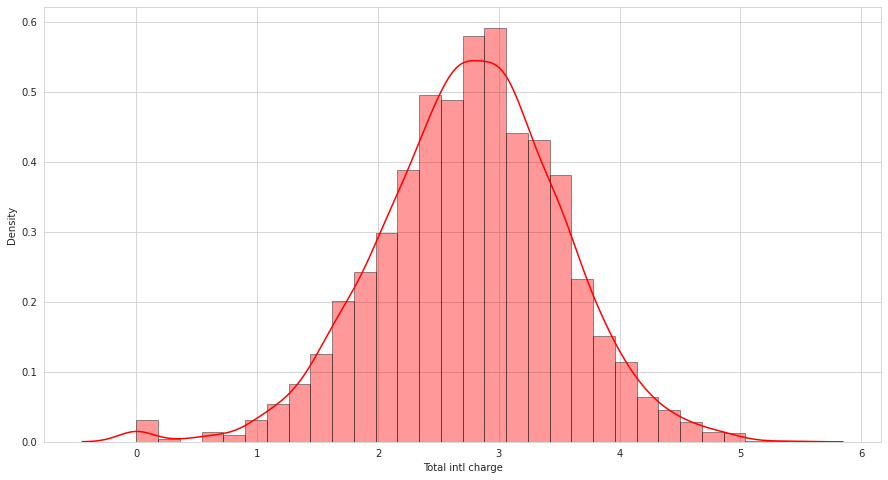

In [ ]:
plt.figure(figsize = (15, 8))
sns.set_style('whitegrid')
sns.distplot(data['Total intl charge'], color ='red', bins = 30, hist_kws={"edgecolor": 'black'})

In [ ]:
data['Total intl charge'].max()

5.4

In [ ]:
data['Total night charge'].mean()

9.037121489621489

In [ ]:
data['State'].nunique()

51

In [ ]:
data['State'].value_counts()

WV    105
MN     82
NY     81
AL     79
VA     76
WY     76
WI     76
OR     76
OH     75
ID     73
UT     72
CT     72
VT     71
TX     71
MI     71
IN     71
KS     68
MD     68
MT     68
NJ     67
NV     66
NC     66
MA     65
WA     65
MS     64
CO     64
RI     64
AZ     64
FL     63
NM     62
ND     62
MO     61
ME     61
NE     60
DE     59
OK     59
KY     58
IL     58
SD     57
SC     56
AR     55
NH     54
GA     54
DC     53
TN     53
AK     52
HI     52
LA     50
PA     44
IA     43
CA     34
Name: State, dtype: int64

Let's check the customer and churn distribution across the states

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'State', data = data, hue = 'Churn')
plt.xticks(rotation = '70')
plt.title('Churn Distribution Across the States')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
most_churned_state=data[data.Churn==True]
most_churned_state=most_churned_state['State'].value_counts()
most_churned_state.sort_index()
top_five_state =most_churned_state.head(5)
#plot bar
plt.subplots(figsize=(10,5))
top_five_state.plot.bar()

plt.title('Top 5 Churned States', size=20)
plt.ylabel('Total number of Churned Customer',size=15)
plt.xlabel('States',size=15)

From above barplot we can see that users of these states are prone to churn. 

New Jersey,Texas and Maryland can definitely choose aggressive pricing strategies and network upgradation and excellent voice quality of calls in these states.
We have to look out for our competeter in these states also as observation says that there may be strong competition.

Text(0, 0.5, 'Count')

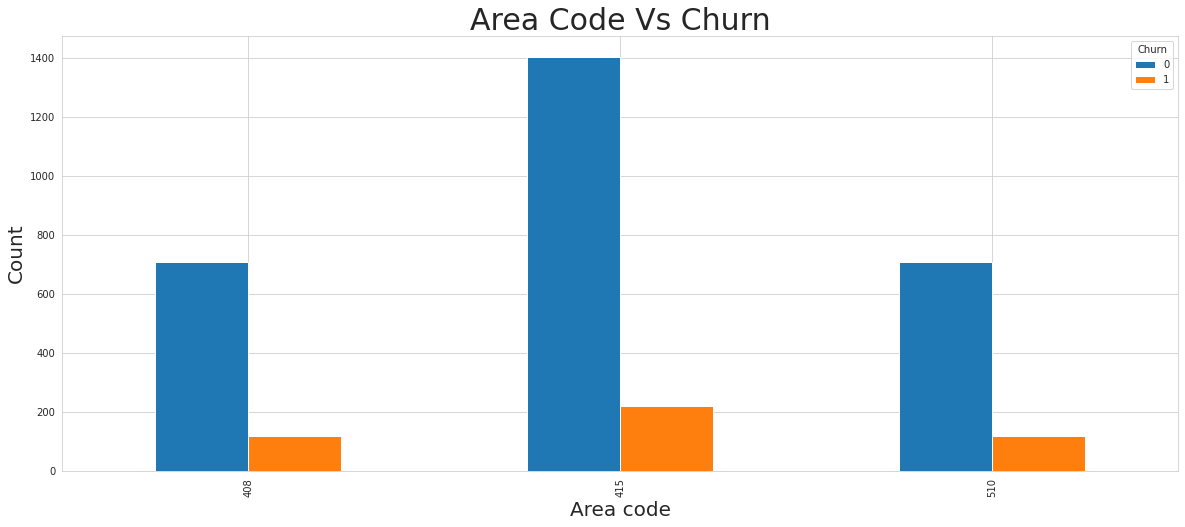

In [ ]:
# area code wise distribution of churn
# plt.figure(figsize=(35,10))
data.groupby(['Area code', 'Churn']).size().unstack(level=-1).plot(kind='bar', figsize=(20,8))
plt.title('Area Code Vs Churn', fontsize=30)
plt.xlabel('Area code', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [ ]:
Area_code_Churn=data.groupby(['Area code', 'Churn']).size()

In [ ]:
Area_code_Churn

Area code  Churn
408        0         709
           1         117
415        0        1404
           1         221
510        0         708
           1         117
dtype: int64

Text(0, 0.5, 'Count')

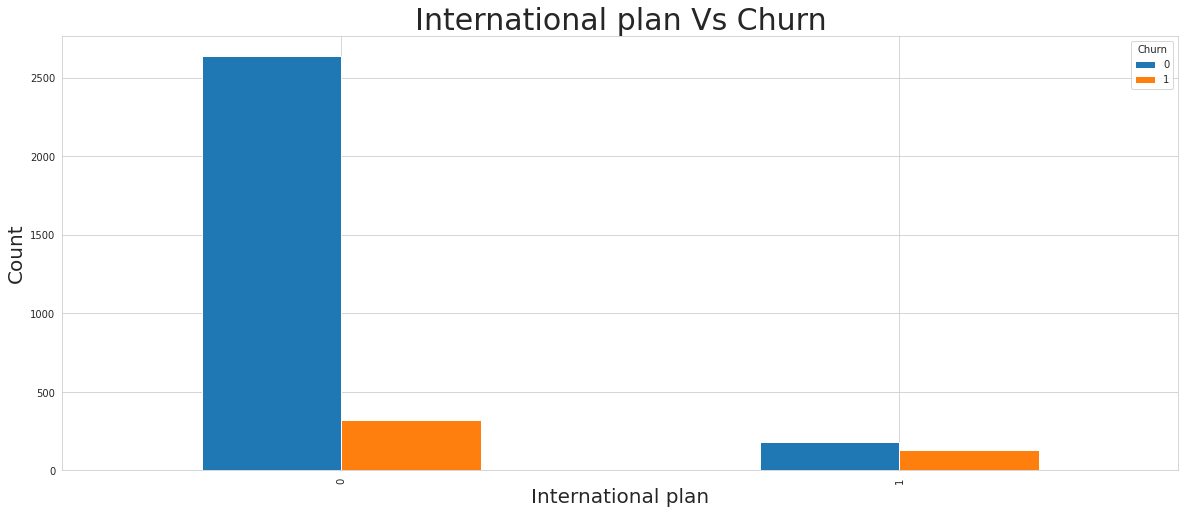

In [ ]:
# International plan Vs churn
#plt.figure(figsize=(40,10))
data.groupby(['International plan', 'Churn']).size().unstack(level=-1).plot(kind='bar',figsize=(20,8))
plt.title('International plan Vs Churn', fontsize=30)
plt.xlabel('International plan', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [ ]:
Intl_Churn=data.groupby(['International plan', 'Churn']).size()

In [ ]:
Intl_Churn

International plan  Churn
0                   0        2637
                    1         322
1                   0         184
                    1         133
dtype: int64

10% of the customer with no international plan are classified as Churn and approaximately 40% of the customer having an international plan are Churn.

Text(0, 0.5, 'Count')

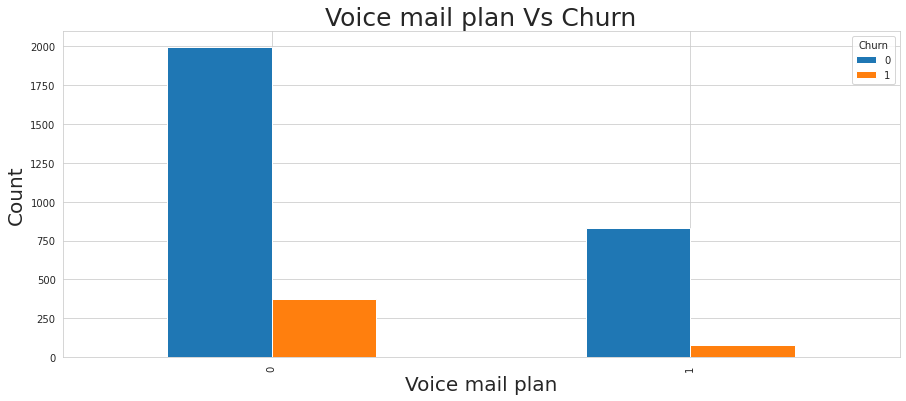

In [ ]:
# Voicemailplan plan Vs churn
#plt.figure(figsize=(40,10))
data.groupby(['Voice mail plan', 'Churn']).size().unstack(level=-1).plot(kind='bar',figsize=(15,6))
plt.title('Voice mail plan Vs Churn', fontsize=25)
plt.xlabel('Voice mail plan', fontsize=20)
plt.ylabel('Count', fontsize=20)

In [ ]:
voicemail_Churn=data.groupby(['Voice mail plan', 'Churn']).size()

In [ ]:
voicemail_Churn

Voice mail plan  Churn
0                0        1993
                 1         376
1                0         828
                 1          79
dtype: int64

15% of the customer with no voice mail plan are classified as Churn and approax 8% of the customer having an international plan are Churn.
So, we can say that the number of churned users who opt for voice mail plan is lesser than campare to those who did not opted. we can predict that our voice mail plan is doing good hence we can improve it furthur.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total day mintues')

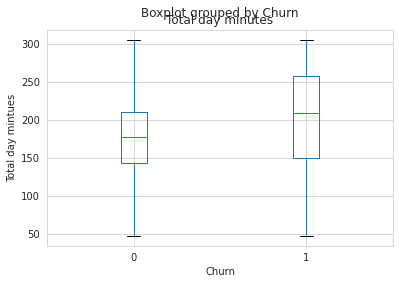

In [ ]:
data.boxplot(by ='Churn', column = ['Total day minutes'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total day mintues')

From the above graph we can observ that users who are spending 225 minutes or more (approx 3.5hrs) tend to switch to other operator.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total day calls')

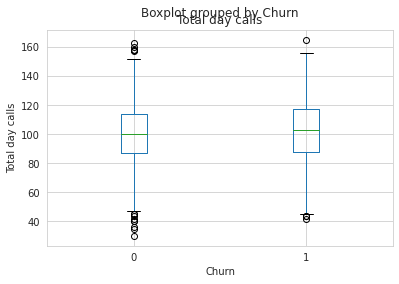

In [ ]:
data.boxplot(by ='Churn', column = ['Total day calls'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total day calls')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total evening mintues')

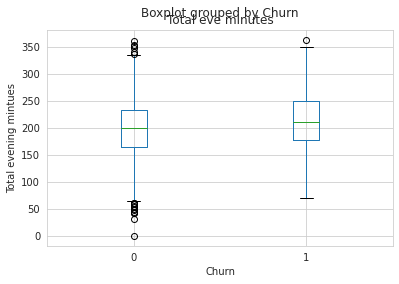

In [ ]:
data.boxplot(by ='Churn', column = ['Total eve minutes'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total evening mintues')

we can observ  thos customers who  are spending 210 minutes or more tend to switch to other operator or likely to be churn. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total evening calls')

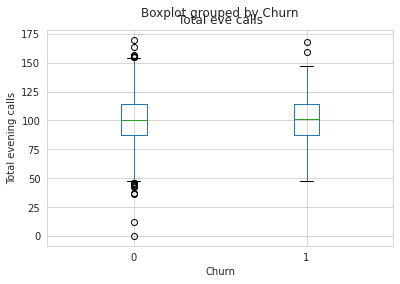

In [ ]:
data.boxplot(by ='Churn', column = ['Total eve calls'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total evening calls')

From the above graph we can say that on an average 100 evening calls are made which is a good indication for the company.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total evening charge')

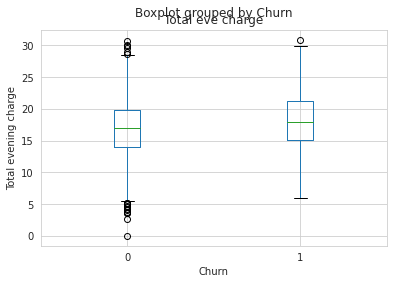

In [ ]:
data.boxplot(by ='Churn', column = ['Total eve charge'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total evening charge')

From observing the above boxplot we can say that charges needs to be re-evaluated and we can give discounts for the customers who have high spending of evening minutes.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total night calls')

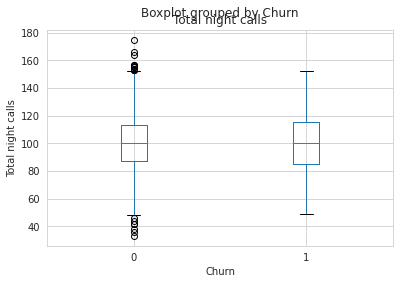

In [ ]:
data.boxplot(by ='Churn', column = ['Total night calls'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total night calls')

from the above graph it is clearly indicates that there is defect in the pricing startegy of the company and we can give discounts for the customers who have high night call minutes spending.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total international charge')

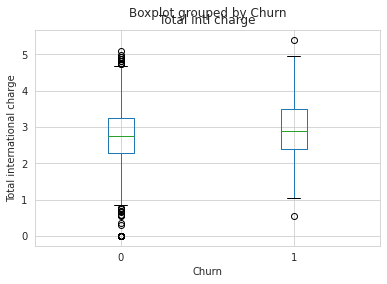

In [ ]:
data.boxplot(by ='Churn', column = ['Total intl charge'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total international charge')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total international minutes')

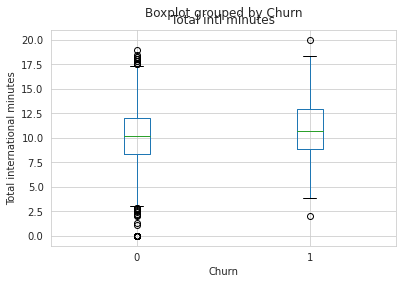

In [ ]:
data.boxplot(by ='Churn', column = ['Total intl minutes'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total international minutes')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Total international calls')

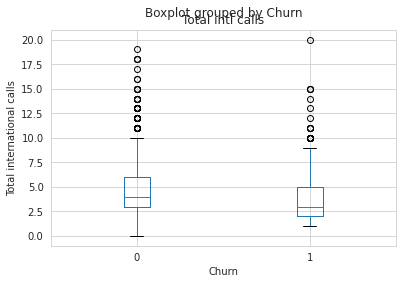

In [ ]:
data.boxplot(by ='Churn', column = ['Total intl calls'], grid = True)
plt.xlabel('Churn')
plt.ylabel('Total international calls')

From the above graph we can say that Different Pricing Strategy and International Calling Rate Optimization would lead to lower churn rate.

Text(0, 0.5, 'Count')

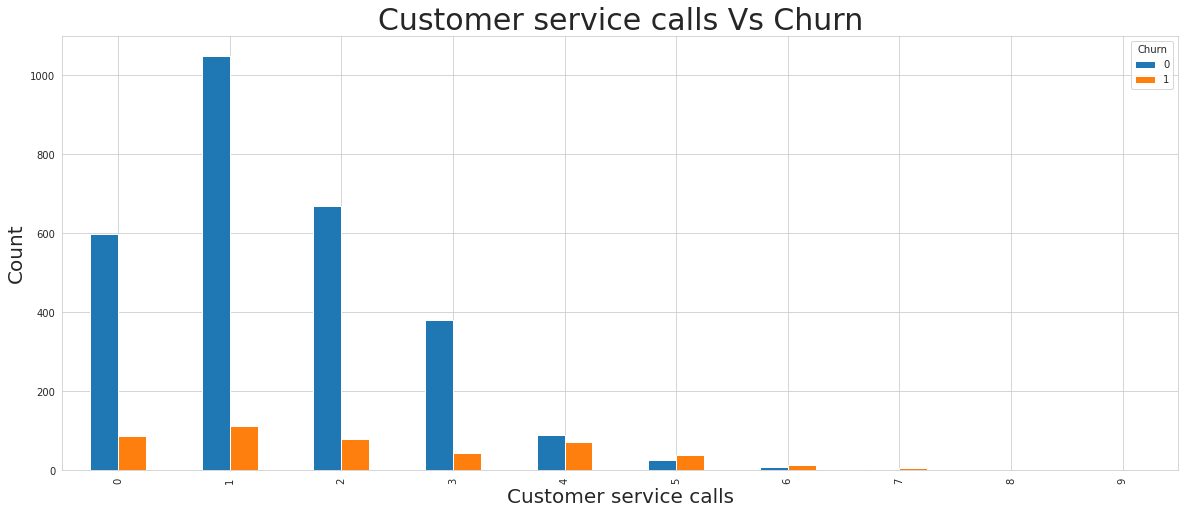

In [ ]:
# Customer service calls Vs churn
#plt.figure(figsize=(40,10))
data.groupby(['Customer service calls', 'Churn']).size().unstack(level=-1).plot(kind='bar',figsize=(20,8))
plt.title('Customer service calls Vs Churn', fontsize=30)
plt.xlabel('Customer service calls', fontsize=20)
plt.ylabel('Count', fontsize=20)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


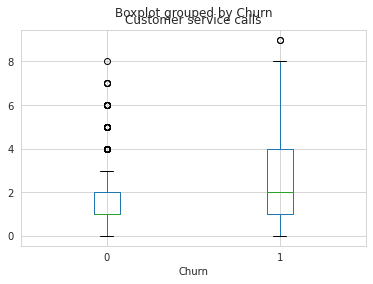

In [ ]:
data.boxplot(by ='Churn', column = ['Customer service calls'], grid = True)

from the above graph it is clear that 50% of the customers who called the company more than 3 times are classified as Churn.

In [ ]:
customer_service_calls_Churn=data.groupby(['Customer service calls', 'Churn']).size()

In [ ]:
customer_service_calls_Churn

Customer service calls  Churn
0                       0         598
                        1          86
1                       0        1047
                        1         113
2                       0         668
                        1          80
3                       0         380
                        1          43
4                       0          89
                        1          71
5                       0          26
                        1          40
6                       0           8
                        1          14
7                       0           4
                        1           5
8                       0           1
                        1           1
9                       1           2
dtype: int64

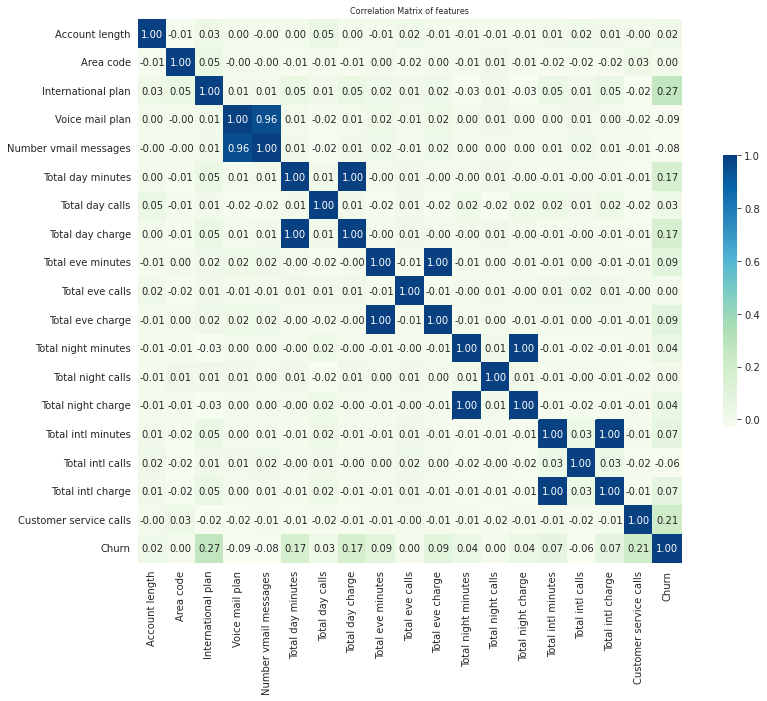

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

From the above graph We can see that the variables 'voice_mail_plan' and 'number_vmail_messages' are highly correlated. I'll still leave both features in for the purposes of this exercise.


# The end...
